<a href="https://colab.research.google.com/github/viswakimi/PowerPulse/blob/main/powerpulse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [6]:
file_path = "/content/drive/MyDrive/guvii/projects dataset/household_power_consumption.txt"  # Replace with the path to your dataset
data = pd.read_csv(file_path, sep=';', low_memory=False)
data.columns = data.columns.str.strip()  # Strip whitespace from column names

In [7]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [9]:
data.shape

(2075259, 9)

In [10]:
# Convert numeric columns
numeric_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                   'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [12]:
data.isnull().sum()

,0
Date,0
Time,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979
Sub_metering_3,25979


In [13]:
missing_data = data[data.isnull().any(axis=1)]
print(missing_data)


               Date      Time  Global_active_power  Global_reactive_power  \
6839     21/12/2006  11:23:00                  NaN                    NaN   
6840     21/12/2006  11:24:00                  NaN                    NaN   
19724    30/12/2006  10:08:00                  NaN                    NaN   
19725    30/12/2006  10:09:00                  NaN                    NaN   
41832     14/1/2007  18:36:00                  NaN                    NaN   
...             ...       ...                  ...                    ...   
1990185   28/9/2010  19:09:00                  NaN                    NaN   
1990186   28/9/2010  19:10:00                  NaN                    NaN   
1990187   28/9/2010  19:11:00                  NaN                    NaN   
1990188   28/9/2010  19:12:00                  NaN                    NaN   
2027411  24/10/2010  15:35:00                  NaN                    NaN   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
6839 

In [14]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.time

In [15]:
data.head(2)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0


In [16]:
# Add a combined datetime column
data['Datetime'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'].astype(str))

In [17]:
data.head(1)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00


In [18]:
# Create new features: Hour, Day, Month, Year
data['Hour'] = data['Datetime'].dt.hour
data['Day'] = data['Datetime'].dt.day
data['Month'] = data['Datetime'].dt.month
data['Year'] = data['Datetime'].dt.year
# Example feature: Is_peak_hour (e.g., 6-9 AM and 5-9 PM)
data['Is_peak_hour'] = data['Hour'].apply(lambda x: 1 if (6 <= x <= 9 or 17 <= x <= 21) else 0)

In [22]:
data.head(3)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Hour,Day,Month,Year,Is_peak_hour
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,17,16,12,2006,1
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,17,16,12,2006,1
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,17,16,12,2006,1


In [24]:
missing_data = data[data.isnull().any(axis=1)]
print(missing_data)


              Date      Time  Global_active_power  Global_reactive_power  \
6839    2006-12-21  11:23:00                  NaN                    NaN   
6840    2006-12-21  11:24:00                  NaN                    NaN   
19724   2006-12-30  10:08:00                  NaN                    NaN   
19725   2006-12-30  10:09:00                  NaN                    NaN   
41832   2007-01-14  18:36:00                  NaN                    NaN   
...            ...       ...                  ...                    ...   
1990185 2010-09-28  19:09:00                  NaN                    NaN   
1990186 2010-09-28  19:10:00                  NaN                    NaN   
1990187 2010-09-28  19:11:00                  NaN                    NaN   
1990188 2010-09-28  19:12:00                  NaN                    NaN   
2027411 2010-10-24  15:35:00                  NaN                    NaN   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
6839         NaN 

In [25]:
# Fill missing values using forward fill (carry the previous value forward)
numerical_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                     'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

data[numerical_columns] = data[numerical_columns].ffill()

# Display the cleaned data
print(data.head())


        Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16  17:24:00                4.216                  0.418   234.84   
1 2006-12-16  17:25:00                5.360                  0.436   233.63   
2 2006-12-16  17:26:00                5.374                  0.498   233.29   
3 2006-12-16  17:27:00                5.388                  0.502   233.74   
4 2006-12-16  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0              18.4             0.0             1.0            17.0   
1              23.0             0.0             1.0            16.0   
2              23.0             0.0             2.0            17.0   
3              23.0             0.0             1.0            17.0   
4              15.8             0.0             1.0            17.0   

             Datetime  Hour  Day  Month  Year  Is_peak_hour  
0 2006-12-16 17:24:00    17   16    

In [26]:
data.isnull().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0
Datetime,0


In [28]:
# Summary statistics
data.describe()


,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Hour,Day,Month,Year,Is_peak_hour
count,2075259,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2075259,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,2008-12-05 19:13:27.255191040,1.086168e+00,1.233280e-01,2.408416e+02,4.604226e+00,1.110995e+00,1.287958e+00,6.416570e+00,2008-12-06 07:12:59.999994112,1.150076e+01,1.577363e+01,6.450359e+00,2.008437e+03,3.750660e-01
min,2006-12-16 00:00:00,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,2006-12-16 17:24:00,0.000000e+00,1.000000e+00,1.000000e+00,2.006000e+03,0.000000e+00
25%,2007-12-12 00:00:00,3.080000e-01,4.800000e-02,2.390000e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2007-12-12 00:18:30,6.000000e+00,8.000000e+00,3.000000e+00,2.007000e+03,0.000000e+00
50%,2008-12-06 00:00:00,5.980000e-01,1.000000e-01,2.410200e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2008-12-06 07:13:00,1.200000e+01,1.600000e+01,6.000000e+00,2.008000e+03,0.000000e+00
75%,2009-12-01 00:00:00,1.524000e+00,1.940000e-01,2.428700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,2009-12-01 14:07:30,1.800000e+01,2.300000e+01,9.000000e+00,2.009000e+03,1.000000e+00
max,2010-11-26 00:00:00,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,2010-11-26 21:02:00,2.300000e+01,3.100000e+01,1.200000e+01,2.010000e+03,1.000000e+00
std,NaN,1.053172e+00,1.125144e-01,3.235574e+00,4.426775e+00,6.115908e+00,5.786865e+00,8.419505e+00,NaN,6.922227e+00,8.787773e+00,3.415762e+00,1.128677e+00,4.841401e-01


Time-series Specific Analysis-to check how the data is spread over time.

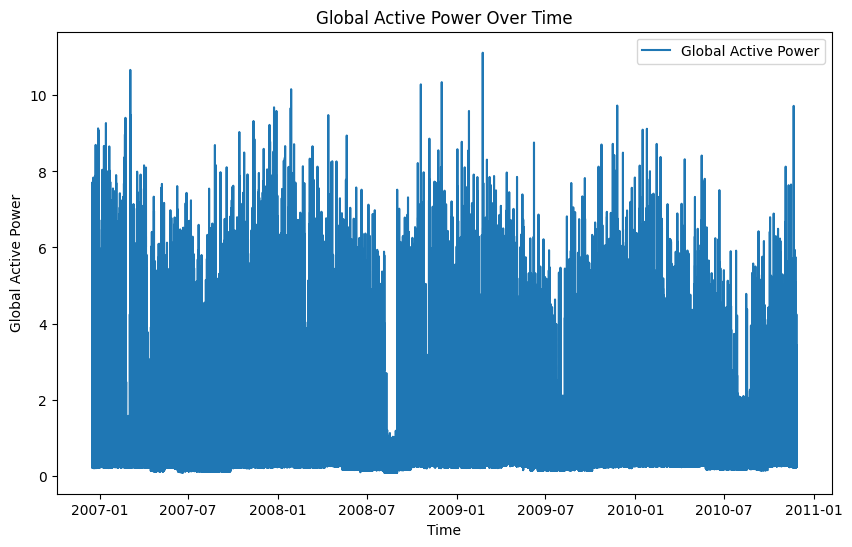

In [29]:
# Plot Global Active Power over time
plt.figure(figsize=(10,6))
plt.plot(data['Datetime'], data['Global_active_power'], label='Global Active Power')
plt.xlabel('Time')
plt.ylabel('Global Active Power')
plt.title('Global Active Power Over Time')
plt.legend()
plt.show()


Check for Seasonality- decompose the time-series data to check for any seasonal patterns.

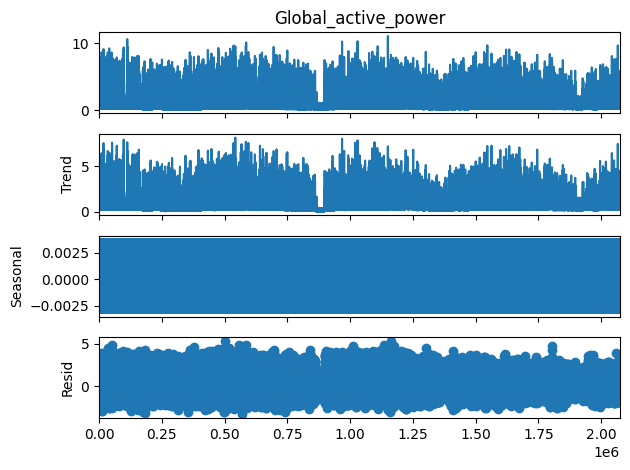

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose Global Active Power data (assuming 'Datetime' is in datetime format)
data['Datetime'] = pd.to_datetime(data['Datetime'])
decomposition = seasonal_decompose(data['Global_active_power'], model='additive', period=24)  # daily seasonality for hourly data

# Plot the decomposition
decomposition.plot()
plt.show()


 Correlation Analysis-correlations between the numerical columns to understand how variables relate to each other (e.g., Global Active Power vs. Voltage).

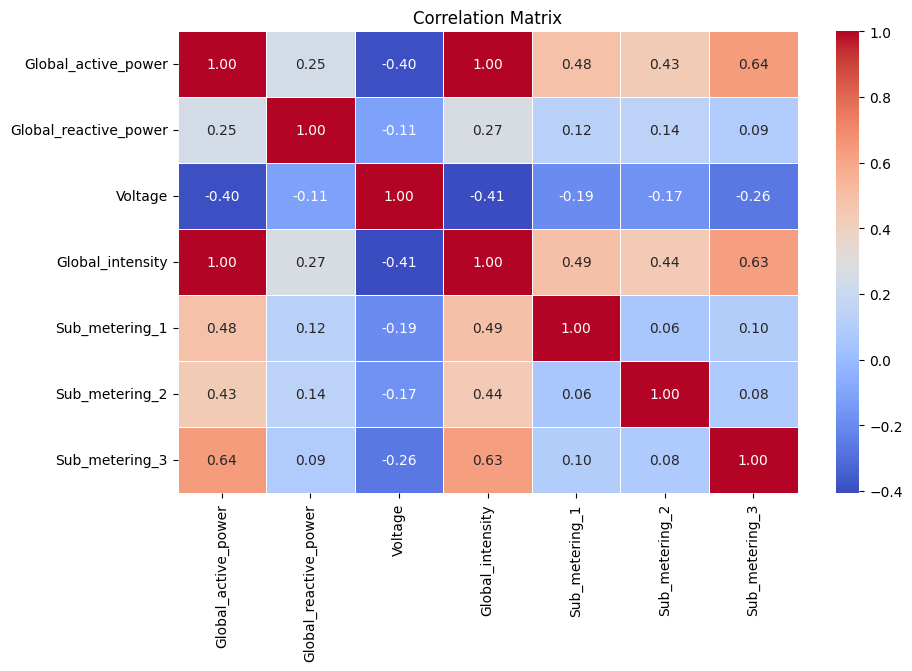

In [31]:
# Correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot the heatmap
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Outlier Detection- detected by looking at boxplots for each variable.

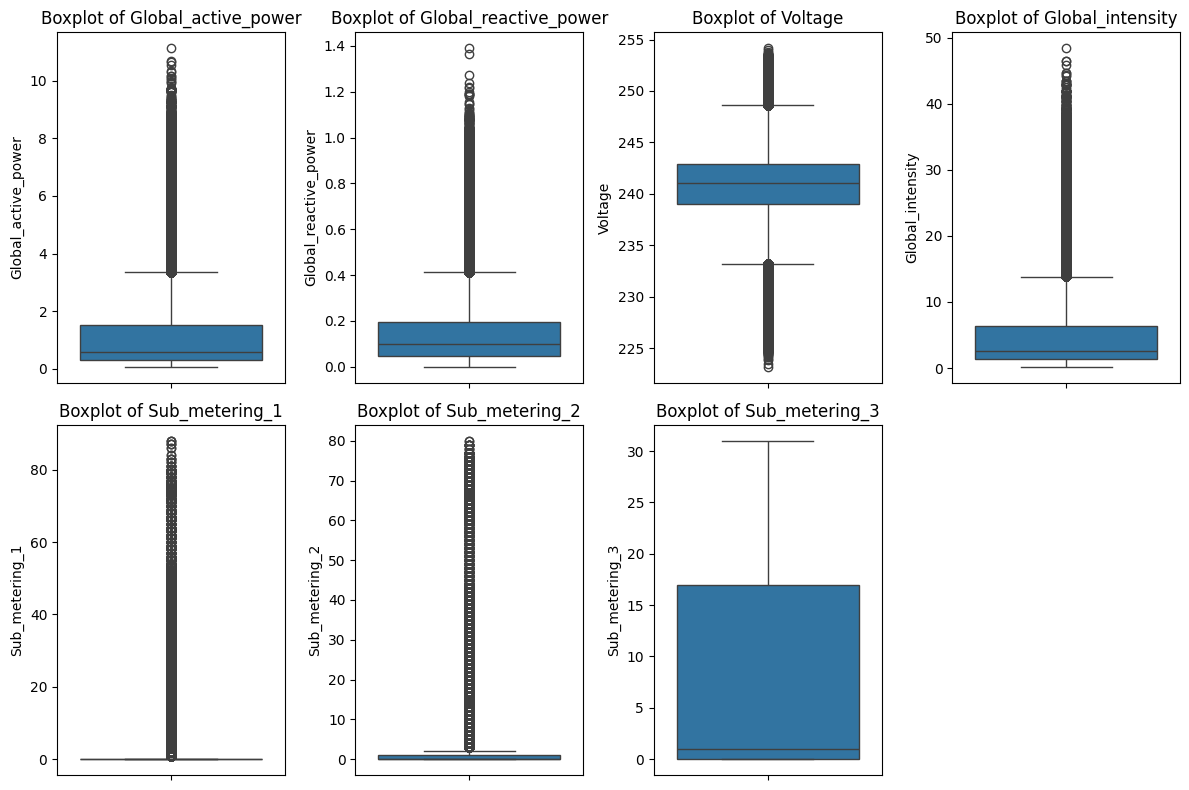

In [32]:
# Boxplot for each numerical feature
plt.figure(figsize=(12,8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)  # Create a subplot for each variable
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


Global_active_power: Outliers are likely due to spikes in power usage.

Global_reactive_power: Outliers could be from reactive power anomalies, which might be due to sudden changes in load.

Voltage: Outliers may be caused by fluctuations in voltage supply.

Global_intensity: This is directly related to active and reactive power and can have similar outliers.

Sub_metering_1, Sub_metering_2, Sub_metering_3: These represent specific sub-metered energy consumption and might have outliers due to specific appliance usage.

Histograms for Distribution- each numerical feature. This can give insight into the skewness or normality of the data.

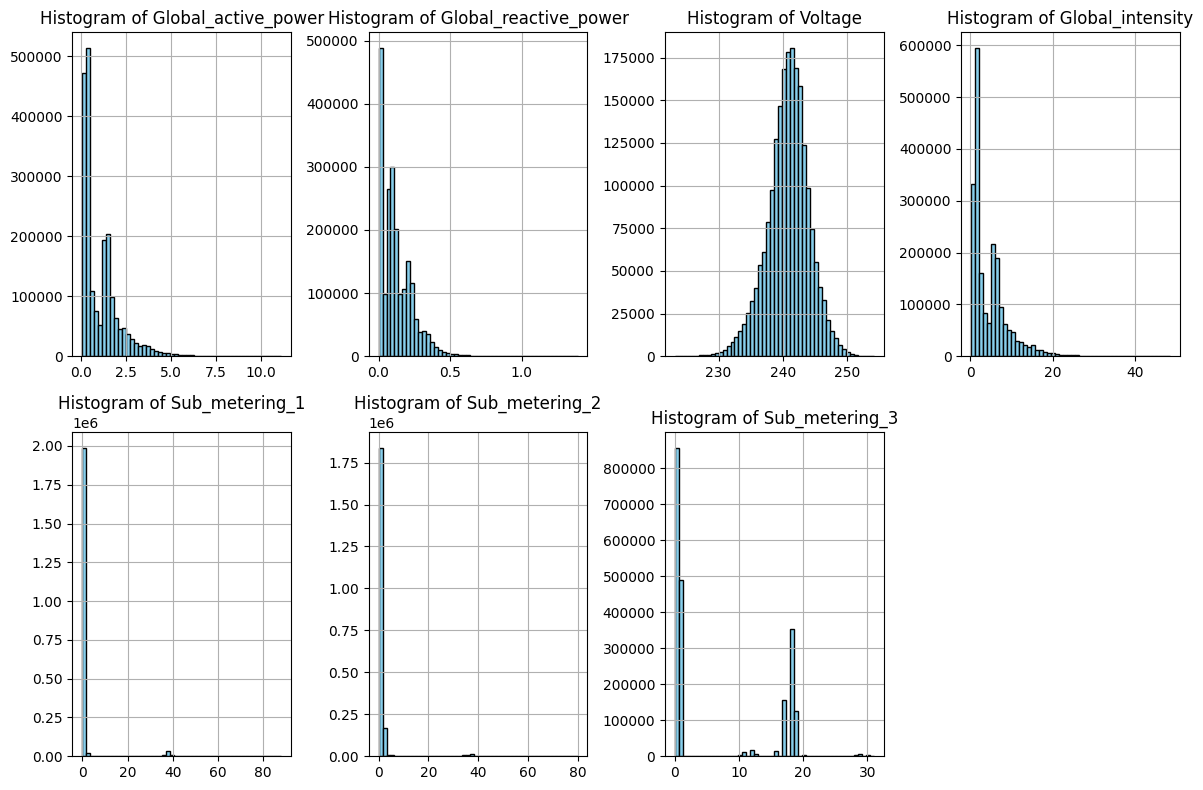

In [33]:
# Plot histograms for each numerical column
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)  # Create a subplot for each variable
    data[column].hist(bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()


 Identify Peak and Off-Peak Hours
You already have a column (Is_peak_hour) that identifies whether the hour is a peak hour or not. You can aggregate the data to check for patterns in energy consumption during peak and off-peak hours.

In [34]:
# Calculate the average energy consumption for peak and off-peak hours
peak_hour_data = data[data['Is_peak_hour'] == 1]
off_peak_hour_data = data[data['Is_peak_hour'] == 0]

# Compare mean consumption for peak and off-peak hours
peak_avg = peak_hour_data[numerical_columns].mean()
off_peak_avg = off_peak_hour_data[numerical_columns].mean()

print("Average values during peak hours:\n", peak_avg)
print("\nAverage values during off-peak hours:\n", off_peak_avg)


Average values during peak hours:
 Global_active_power        1.432518
Global_reactive_power      0.130773
Voltage                  239.710849
Global_intensity           6.065638
Sub_metering_1             1.477191
Sub_metering_2             1.371925
Sub_metering_3             8.170987
dtype: float64

Average values during off-peak hours:
 Global_active_power        0.878300
Global_reactive_power      0.118860
Voltage                  241.520254
Global_intensity           3.727132
Sub_metering_1             0.891215
Sub_metering_2             1.237564
Sub_metering_3             5.363624
dtype: float64


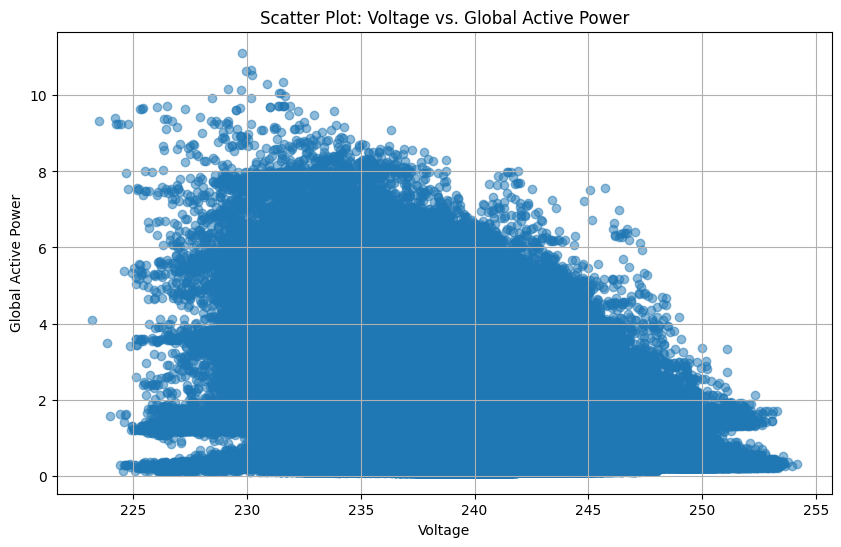

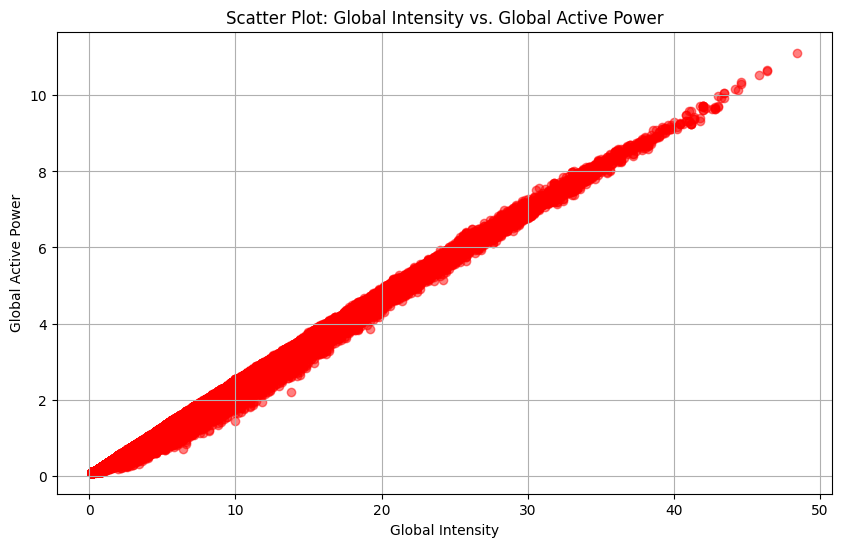

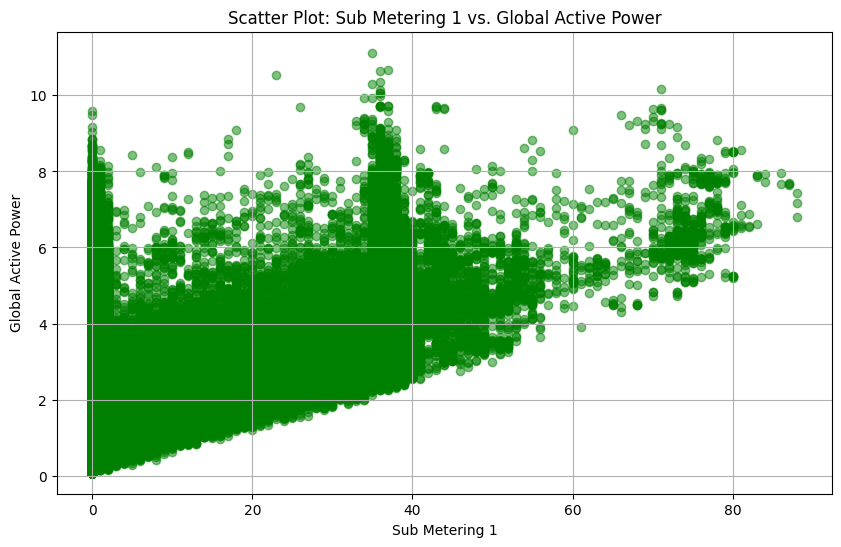

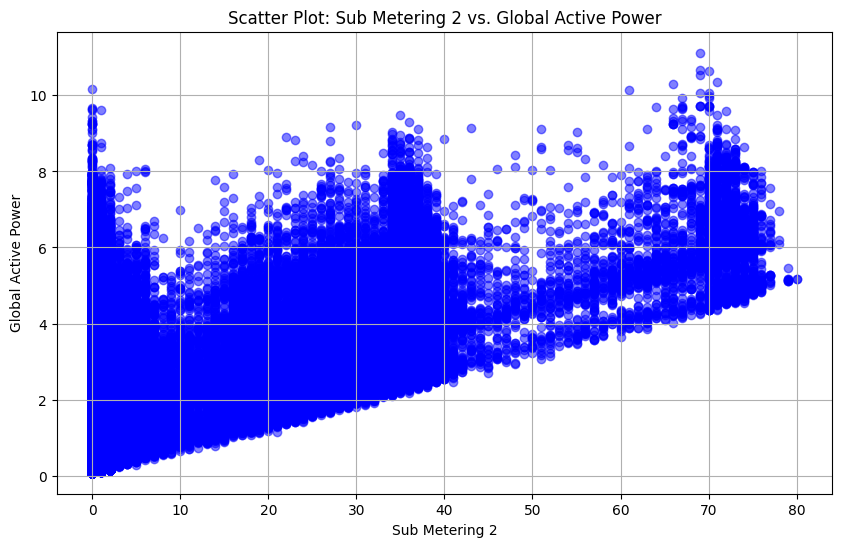

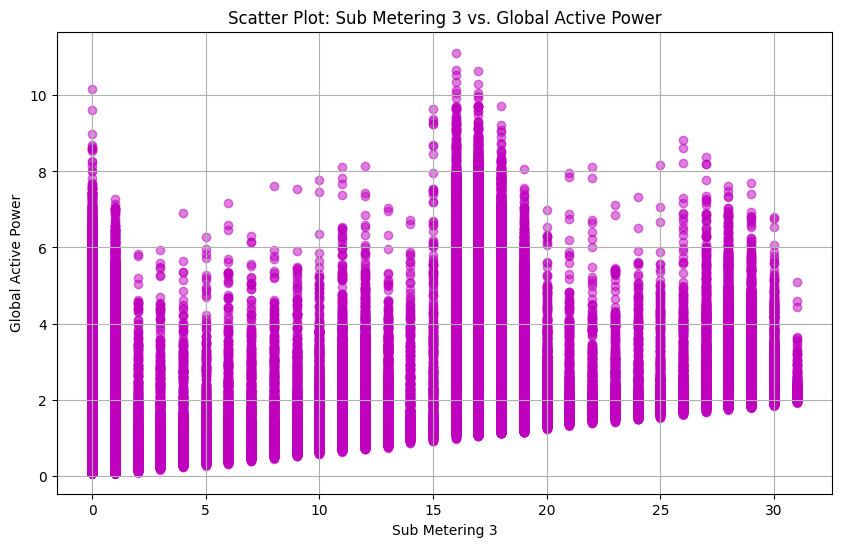

In [37]:
import matplotlib.pyplot as plt

# Scatter plot for Global_active_power vs. Voltage
plt.figure(figsize=(10, 6))
plt.scatter(data['Voltage'], data['Global_active_power'], alpha=0.5)
plt.title('Scatter Plot: Voltage vs. Global Active Power')
plt.xlabel('Voltage')
plt.ylabel('Global Active Power')
plt.grid(True)
plt.show()

# Scatter plot for Global_active_power vs. Global_intensity
plt.figure(figsize=(10, 6))
plt.scatter(data['Global_intensity'],data['Global_active_power'], alpha=0.5, color='r')
plt.title('Scatter Plot: Global Intensity vs. Global Active Power')
plt.xlabel('Global Intensity')
plt.ylabel('Global Active Power')
plt.grid(True)
plt.show()

# Scatter plot for Sub_metering_1 vs. Global_active_power
plt.figure(figsize=(10, 6))
plt.scatter(data['Sub_metering_1'], data['Global_active_power'], alpha=0.5, color='g')
plt.title('Scatter Plot: Sub Metering 1 vs. Global Active Power')
plt.xlabel('Sub Metering 1')
plt.ylabel('Global Active Power')
plt.grid(True)
plt.show()

# Scatter plot for Sub_metering_2 vs. Global_active_power
plt.figure(figsize=(10, 6))
plt.scatter(data['Sub_metering_2'], data['Global_active_power'], alpha=0.5, color='b')
plt.title('Scatter Plot: Sub Metering 2 vs. Global Active Power')
plt.xlabel('Sub Metering 2')
plt.ylabel('Global Active Power')
plt.grid(True)
plt.show()

# Scatter plot for Sub_metering_3 vs. Global_active_power
plt.figure(figsize=(10, 6))
plt.scatter(data['Sub_metering_3'], data['Global_active_power'], alpha=0.5, color='m')
plt.title('Scatter Plot: Sub Metering 3 vs. Global Active Power')
plt.xlabel('Sub Metering 3')
plt.ylabel('Global Active Power')
plt.grid(True)
plt.show()


In [41]:
Q1 = data['Sub_metering_1'].quantile(0.25)
Q3 = data['Sub_metering_1'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['Sub_metering_1'] < lower_bound) | (data['Sub_metering_1'] > upper_bound)]
